<a href="https://colab.research.google.com/github/Saicharan1818/theta/blob/main/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
print(file_name)

Saving Cars.csv to Cars.csv
Cars.csv


In [4]:
df=pd.read_csv(file_name)
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [5]:
df.corr(numeric_only=True)

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [6]:
#build model
import statsmodels.formula.api as smf


model=smf.ols('MPG~WT+VOL+SP+HP',data=df).fit()

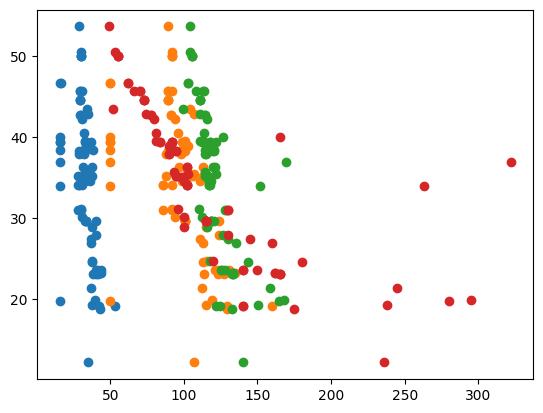

In [7]:
#add scatter plots for the above code
import matplotlib.pyplot as plt
plt.scatter(df['WT'],df['MPG'])
plt.scatter(df['VOL'],df['MPG'])
plt.scatter(df['SP'],df['MPG'])
plt.scatter(df['HP'],df['MPG'])

In [8]:
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [9]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [10]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [13]:
#R squared value
(model.rsquared, model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [14]:
ml_v=smf.ols('MPG~VOL',data = df).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [15]:
(ml_v.rsquared, ml_v.rsquared_adj)

(0.27990086511227075, 0.27078568618964116)

In [16]:
ml_w=smf.ols('MPG~WT',data = df).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [ ]:
(ml_v.rsquared,ml_v.rsquared_adj)

(0.27990086511227075, 0.27078568618964116)

In [17]:
ml_wv=smf.ols('MPG~WT+VOL',data = df).fit()
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [18]:
#calculating VIF
rsq_hp= smf.ols("HP~WT+VOL+SP",data=df).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_wt=smf.ols("WT~HP+VOL+SP",data=df).fit().rsquared
vif_wt=1/(1-rsq_wt)

rsq_vol=smf.ols("VOL~HP+WT+SP",data=df).fit().rsquared
vif_vol=1/(1-rsq_vol)

rsq_sp=smf.ols("SP~HP+WT+VOL",data=df).fit().rsquared
vif_sp=1/(1-rsq_sp)

d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame=pd.DataFrame(d1)
Vif_frame


,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


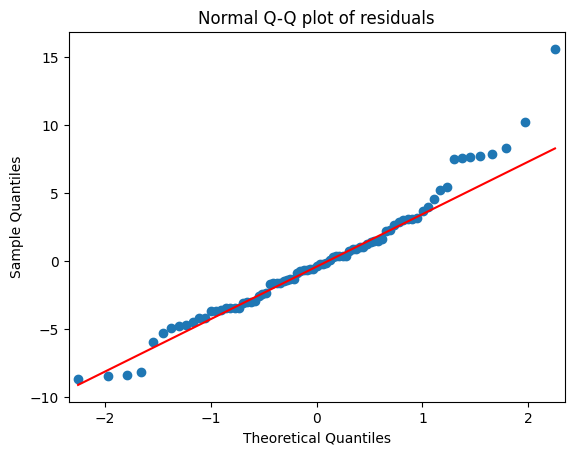

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid<-30))

[array([], dtype=int64)]

In [23]:
list(np.where(model.resid>10))

[array([ 0, 76])]

In [25]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

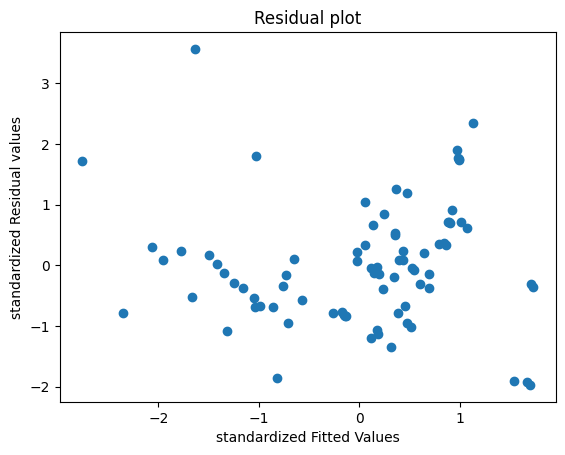

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standardized Fitted Values')
plt.ylabel('standardized Residual values')
plt.show()